# Unsupervised Learning - Exercise

```In this exercise you will experience with K-Means, and PCA, and will do some use of them for handling practical problems.```

~```Gilad Royz```

# Part 1 - Clustering

```In this question you are asked to examine the 3 clustering algorithms: KMeans, DBscan and GaussianMixture.```

```You will have to generate manipulative datasets, and demonstrate the weaknesses of each method. That is, for each one of the clustering methods, generate a dataset such that one of the methods will fail, and the others will not.
Deal with the model's hyper parameters, and conclude for yourself how sensitive they are.```

```For each dataset draw your results using your favorite visualization tool.```

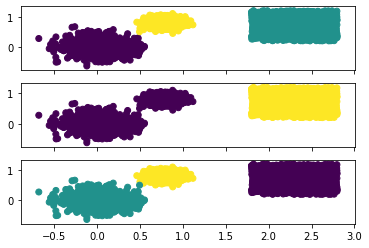

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))

### dataset for example
data = np.concatenate([np.random.normal(0, 0.2, (1000, 2)),\
                       np.random.normal(0.8, 0.1, (1000, 2)),\
                       np.random.random((1000,2)) + np.array([1.8,0.2])])

clf_kmeans = KMeans(3, n_jobs=-1, max_iter=100)
y_kmeans = clf_kmeans.fit_predict(data)

clf_dbscan = DBSCAN(eps = 0.3, min_samples = 10, n_jobs = -1)
y_dbscan = clf_dbscan.fit_predict(data)

clf_gaussian = GaussianMixture(n_components=3)
clf_gaussian.fit(data)
y_gaussian = clf_gaussian.predict(data)

f, axarr = plt.subplots(3, sharex=True)
axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
axarr[2].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_gaussian)))
plt.show()

```Answer the following questions based on what you learned from the previous question:```
- ```Which method is easiest to use?```
- ```Which method is the fastest to use?```

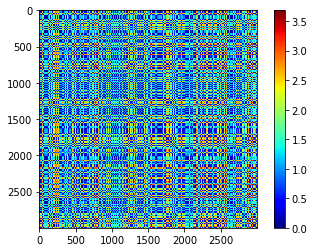

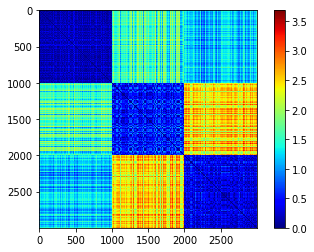

In [2]:
## here we can see the effect of the clustering on the metric matrix between every data point

from sklearn.utils import shuffle
from collections import Counter
from scipy.spatial.distance import cdist

data = shuffle(data)
distances = cdist(data, data, metric='euclidean')
plt.imshow(distances, cmap='jet')
plt.colorbar()
plt.show()

clusters = clf_kmeans.fit_predict(data)
clusters_sizes = Counter(clusters)
indexes = np.array(list(map(lambda x: x[0], sorted(enumerate(clusters), key=lambda x: (-clusters_sizes[x[1]], x[1])))))
plt.imshow(distances[indexes][:,indexes], cmap='jet')
plt.colorbar()
plt.show()

```We will now use K-Meansto quantize image colors:```

```First load the given celebrity image from the image folder (can be found in:```
https://drive.google.com/file/d/1nUk_Q-ahhUrjmUl_sM9ovb84DybuaQCe/view?usp=sharing)

In [2]:
import cv2

In [3]:
img = cv2.imread('images/Alicia Vikander/1.jpg')[:,:,::-1]
img_array = np.array(img)

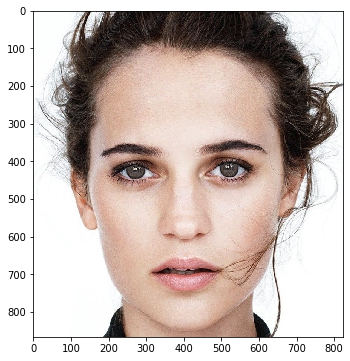

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(img_array)

```Every pixel in the image is composed of three colors (Red, Green, Blue), and therefore, every pixel is a vector: (r,g,b).```
```Create a list of every color pixel in the image: (array.reshape will work)```

In [5]:
dataset = img.reshape(-1,3)

```Train a K-Means model with k=10 on the list of colors:```

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(10, n_init=1)
clusters = kmeans.fit_predict(dataset)

```Now replace every color vector with the vector of centroid bector of it's cluster.```
```rebuild the image and plot it. How is it compared to the original?```

In [8]:
new_dataset = kmeans.cluster_centers_[clusters]

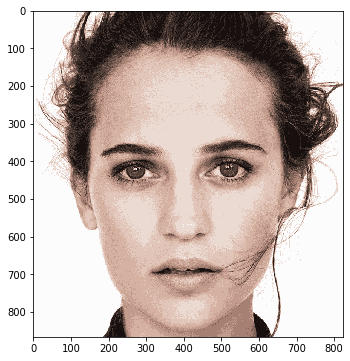

In [9]:
plt.figure(figsize=(6,6))
plt.imshow(new_dataset.reshape(img_array.shape).astype(np.uint8))

```Now train K-Means model with k=2,...,15, and plot the "within-cluster sum-of-squares criterion"```($R_k$)``` for all the k's.```

```(reduce the n_init if it takes too much time)```

(Explain on $R_k$ can be found in: https://scikit-learn.org/stable/modules/clustering.html#k-means)

```Can we conclude "how many clusters" are there, from the graph?```

In [11]:
errors = []
for i in range(2, 16):
    kmeans = KMeans(i, n_init=1)
    kmeans.fit(dataset)
    errors += [kmeans.inertia_]

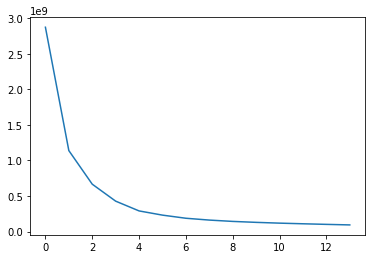

In [12]:
plt.plot(errors)

# part 2 - Dimensionality reduction

```The goal of this part is to experience with some basic features of PCA, and have a notion about the capabilities, and uses of this method.```

```We will look on facial images of 3 celebrities, and use PCA to extract facial patterns from images.```
```We then try to use those patterns to build a classifier that can distinguish the 3 celebrities.```

#### Brief refresh on PCA

``Given a dataset X composed of n vectors of dimension d, PCA(k) compute the k vectors`` $w_1,...,w_k$ ``(of dimension d) that have the next property:``

In [3]:
celebs = ['Alicia Vikander', 'Amy Adams', 'Andy Serkis']

In [4]:
def read_gray_image(path):
    """
    return array with:
    0-axis: height
    1-axis: width
    2-axis: color(rgb)
    """
    return cv2.cvtColor(cv2.imread(path)[:,:,::-1], cv2.COLOR_RGB2GRAY)

In [5]:
def read_image(path):
    
    return cv2.imread(path)[:,:,::-1]

```First we load the face images:```

In [6]:
import os
import cv2

face_imgs = []
labels = []
for j, c in enumerate(celebs):
    
    dir_path = 'images/{}/'.format(c)
    dir_file_paths = [dir_path + i for i in os.listdir(dir_path)]
    
    temp_imgs = [read_image(dir_path + i) for i in os.listdir(dir_path)]
    
    labels += [j]*len(dir_file_paths)
    face_imgs += [read_image(i) for i in dir_file_paths]

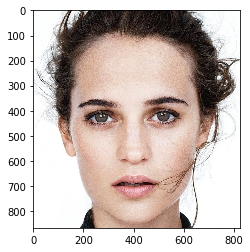

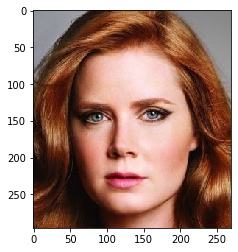

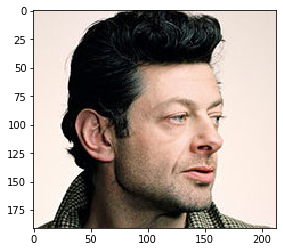

In [21]:
plt.imshow(face_imgs[np.where(np.array(labels)==0)[0][0]])
plt.show()
plt.imshow(face_imgs[np.where(np.array(labels)==1)[0][0]])
plt.show()
plt.imshow(face_imgs[np.where(np.array(labels)==2)[0][0]])
plt.show()

```For layter steps we would like to resize all the images to have the same width x height. It is best to choose new shape that least distort the images.```

```Plot the shapes of all the images on the "width", "height" plane: (What does that remind you of?)```

In [25]:
all_shapes = np.array([i.shape for i in face_imgs])

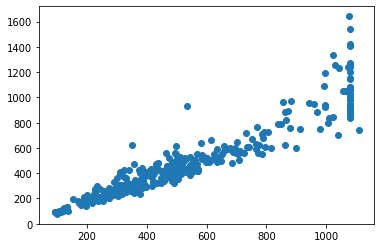

In [26]:
plt.scatter(all_shapes[:,0], all_shapes[:,1])

```Now on the same plot, draw the point of the "avarage shape". Is it looks like it represents the trend?```

```Resize all the face images to have the "avarage shape." ( cv2.resize will work)```

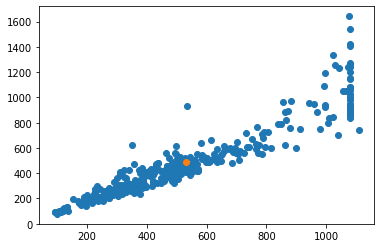

In [27]:
plt.scatter(all_shapes[:,0], all_shapes[:,1])
plt.scatter([all_shapes[:,0].mean()], [all_shapes[:,1].mean()])

In [64]:
new_shape = (224, 224)#tuple(all_shapes.mean(0).astype(int))

In [65]:
resized_imgs = np.array([cv2.resize(i, (new_shape[1], new_shape[0])) for i in face_imgs])

In [67]:
idx = np.random.choice(len(resized_imgs), len(resized_imgs), False)

In [69]:
resized_imgs = resized_imgs[idx]

In [71]:
images_labels = np.array(celebs)[np.array(labels)][idx]

```Now flatten all the images into vectors, and split them randomly to train and test groups (with ratio (0.7, 0.3)).```

In [21]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [22]:
dataset_pca = resized_imgs.reshape(len(resized_imgs),-1).astype(float)

In [390]:
for i in np.unique(labels):
    dataset_pca[labels == i] -= dataset_pca[labels == i].mean(0)

In [23]:
train_X, test_X, train_Y, test_Y = train_test_split(dataset_pca, labels, train_size=0.7)

```Now train a PCA model with n_components=10 on the train set. How much variance(in %) the 10 components explain? is it good compared to the dimention of the vectors?```

In [24]:
total_pca = PCA(20)
total_pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
total_pca.explained_variance_ratio_.sum()

0.7432222286579064

```Take the 10 component vectors of the model, reshape them to the image shape, and plot all of them:```

It looks something like that:
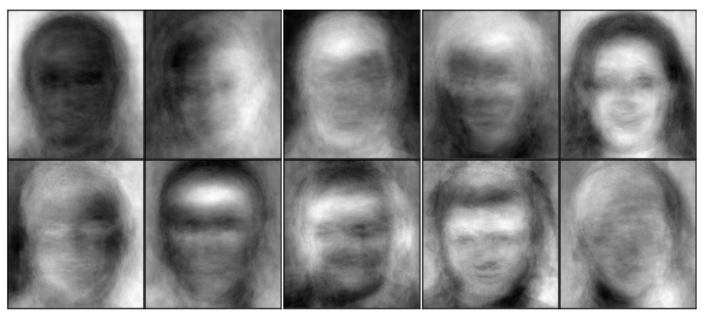

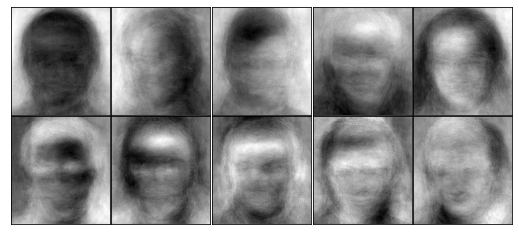

In [26]:
fig, ax = plt.subplots(2,5, figsize=(9,4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw={'hspace':0.01, 'wspace':0.01})
for i in range(10):
    ax[i//5,i%5].imshow(total_pca.components_[i].reshape(new_shape), cmap='gray')

```The "faces" that we got, can roוghly be refered to as the "face patterns" that are the most dominant in the images. can you make sense of the patterns?```

```Notice that if we transform an image to the low dimension and then inverse transform it back, we actually find the "best combination of the patterns" that reconstract out image```

```Now make a PCA model with n_components=10 for the images of every celebrity in the train set (pca_1, pca_2, pca_3). And Then:```

- ```Take all the vectors from the test set.```
- ```Transform them to the low dimension.```
- ```Inverse transform them back to original dimension.```
- ```Compute "mean square error" (MSE) between the original vectors to the reconstructed version of themselves.```
- ```For every vector, mark the PCA model that gave the smallest MSE. (as prediction)```
- ```Print the "confusion matrix" of the prediction.``` (https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
pcas = []
for i in range(3):
    pca = PCA(20)
    pca.fit(train_X[np.array(train_Y)==i])
    pcas += [pca]

In [46]:
recovered = []
for i in range(3):
    recovered += [pcas[i].inverse_transform(pcas[i].transform(test_X))]
recovered = np.array(recovered)

In [47]:
recovering_errors = np.linalg.norm(recovered - test_X, axis=2)
best_recovring_celeb = np.argmin(recovering_errors, axis=0)

In [48]:
mat = confusion_matrix(test_Y, best_recovring_celeb)
accuracy = np.mean(test_Y == best_recovring_celeb)

In [49]:
print('accuracy: ', accuracy)
print('confusion matrix:\n', mat)

accuracy:  0.8055555555555556
confusion matrix:
 [[26  5  2]
 [ 7 31  2]
 [ 5  0 30]]


```Is it work well? If yes, try to explain why.```

In [ ]:
## The PCA of every celebrity learned to compress and reconstract only its celeb images.
## So the reconstruction error of the a given celeb image should be smaller when reconstructed with its celeb PCA.

## Bonus (5 pts)

```Perform the prediction process with PCA models with n_components=[1,10,20,30,40,50,60,70].```

In [56]:
def pca_classifier(k):
    
    pcas = []
    for i in range(3):
        pca = PCA(k)
        pca.fit(train_X[np.array(train_Y)==i])
        pcas += [pca]

    recovered = []
    for i in range(3):
        recovered += [pcas[i].inverse_transform(pcas[i].transform(test_X))]

    recovering_errors = np.array(recovered) - test_X
    best_recovring_celeb = np.argmin(np.linalg.norm(recovering_errors, axis=2), axis=0)

    score = np.mean(test_Y == best_recovring_celeb)

    return score

In [52]:
scores = []
for k in [1,10,20,30,40,50,60,70]:
    scores += [pca_classifier(k)]

```Plot the accuracy of the models. what is the trend of the performance when n_components increases? Is it what you expected? try to explain.```

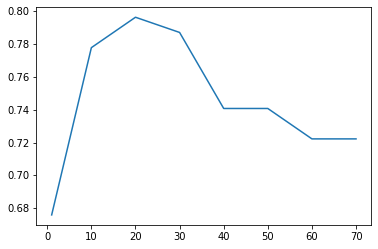

In [54]:
plt.plot([1,10,20,30,40,50,60,70], scores)

In [ ]:
## When k is small it is bad, and get better when k is bigger.
## But surprisingly the score is getting worse when k is too big.
## when k is too small the the pca take more general features of the celebs images, and when too large, it takes very specific
## features from the celebs images. (when k is large it learns to reconstruct only the images it saw in train)
## So what we get is underfitting when k is small and overfitting when k is big.